# Bagirata applicants short analysis (06/08/2021)

### Libraries Import

In [1]:
__author__ = 'egogeomars'

import os

import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data Import and Encoding 

In [3]:
csv_filename = 'bagirata_06082021.csv'
filepath = '../'
fullpath = os.path.join(filepath, csv_filename)

# load data set into pandas dataframe
raw = pd.read_csv(fullpath, sep=',')

### Data Extraction and Initial Exploration

Mulai proses eksplorasi data

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 25 columns):
 #   Column                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                     --------------  -----         
 0   Timestamp                                                                                                  8589 non-null   datetime64[ns]
 1   Nama                                                                                                       8588 non-null   object        
 2   Email                                                                                                      0 non-null      float64       
 3   Akun Media Sosial 1                                                                                        8585 non-null   object        
 4   No. Telp                      

Hapus kolom dengan **null values**

In [5]:
raw.drop(raw.columns[[2,22,24]])

Periksa

In [6]:
raw.columns

Index(['Timestamp', 'Nama', 'Akun Media Sosial 1', 'No. Telp', 'Pekerjaan',
       'Industri', 'Kontrak / Tipe Kerja', 'Nama kantor/perusahaan', 'Lokasi',
       'Ceritakan secara singkat dampak dari pandemi yang kamu hadapi dan peruntukan dana bantuan yang dibutuhkan',
       'Jumlah dana minimum yang dibutuhkan',
       'Ucapan terima kasih ke pengirim dana', 'Preferensi Pengiriman Dana',
       'Upload QR Code GOPAY', 'Cantumkan JENIUS Cashtag ',
       'Upload QR Code DANA', 'Untuk jangka waktu',
       'Akun Media Sosial 2 (optional)', 'Akun Media Sosial 3 (optional)',
       'Email address', 'Upload QR Code OVO', 'Status'],
      dtype='object')

Ubah nama kolom

In [7]:
raw.columns = ['Timestamp', 'Nama', 'SosMed1', 'Telp', 'Pekerjaan', 'Industri', 'Tipe_Pekerja', \
               'Perusahaan', 'Lokasi', 'Kondisi', 'Kebutuhan_dana_minimum', \
               'Ucapan_terima_kasih_ke_pengirim_dana', 'Preferensi_pengiriman_dana', \
               'QR_Code_GOPAY', 'JENIUS_Cashtag', 'QR_Code_DANA', 'Jangka_waktu', \
               'SosMed2', 'SosMed3', 'Email', 'QR_Code_OVO', 'Status']

Periksa

In [8]:
raw.columns

Index(['Timestamp', 'Nama', 'SosMed1', 'Telp', 'Pekerjaan', 'Industri',
       'Tipe_Pekerja', 'Perusahaan', 'Lokasi', 'Kondisi',
       'Kebutuhan_dana_minimum', 'Ucapan_terima_kasih_ke_pengirim_dana',
       'Preferensi_pengiriman_dana', 'QR_Code_GOPAY', 'JENIUS_Cashtag',
       'QR_Code_DANA', 'Jangka_waktu', 'SosMed2', 'SosMed3', 'Email',
       'QR_Code_OVO', 'Status'],
      dtype='object')

### Duplicate Entries

Tampilkan jumlah pemohon berdasarkan nama

In [20]:
raw['Nama'].size

4803

Tampilkan jumlah pemohon berdasarkan nama (unique)

In [21]:
raw['Nama'].nunique()

4729

Hitung selisih

In [22]:
print("Apparently there are", raw['Nama'].size - raw['Nama'].nunique(), "names that appear more than once")

Apparently there are 74 names that appear more than once


Kita periksa entri ganda pelamar

Siapa saja?

In [24]:
double_applicants['Nama'].value_counts()

Sri Rahayu       3
Arifin           3
Ade Kurniawan    3
Fitriyani        3
Andriansyah      3
                ..
Dwi Astuti       2
Nurhasanah       2
Muhamad Reza     2
Rina Andriani    2
Usman            2
Name: Nama, Length: 68, dtype: int64

Sebelum melanjutkan, kita simpan daftar pelamar ganda ke dalam file `.csv`.

In [25]:
double_applicants.to_csv('DoubleApplicants06082021.csv')

### Duplicate Removal

Remove duplicate, by keeping the **first entry**. Why first? If one has `status = Done` and made a re-request of fund, we should prioritize others.

**Note**: **it depends to bagirata policy whether remove newer one or keep both of them.** In this analysis I will keep first entry only.

Hapus duplikat

In [34]:
raw.drop_duplicates(subset=['Nama'])

Periksa ukuran dataframe

In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4729 entries, 4 to 8588
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Timestamp                             4729 non-null   datetime64[ns]
 1   Nama                                  4729 non-null   object        
 2   SosMed1                               4729 non-null   object        
 3   Telp                                  4729 non-null   object        
 4   Pekerjaan                             4729 non-null   object        
 5   Industri                              4729 non-null   object        
 6   Tipe_Pekerja                          4729 non-null   object        
 7   Perusahaan                            4702 non-null   object        
 8   Lokasi                                4728 non-null   object        
 9   Kondisi                               4729 non-null   object        
 10  

From 4298 reduced to only 4246 rows only

### Industry Cleaning

Example of Industry categories:

 * Service & Hospitality - (Food & Beverages, Lodging, Travel & Tourism)
 * Cleaning Services - Note: cleaning that doesn't belong to Service & Hospitality
 * Transportation & Logistic - (Aviation, Courier, Ride hailing)
 * Education
 * Manufacture - (Garments, Machinery, etc)
 * Retail - (Supermarkets, Department stores, Chain stores, Specialty stores, Variety stores, Franchise stores, Mail-order houses, Online merchants, Door-to-door sellers)
 * Media & Entertainment - (Print, News, Radio, Television, Film, Music, Art, Advertisement)
 * Construction 
 * Banking & Finance
 * Oil & Gas
 * Farm
 * Fisheries

Updated on August 4, 2021, here are the industry category options on the **Bagirata** application form

 * Media / Periklanan
 * Transportasi: Penerbangan
 * Transportasi: Ojek Online
 * Transportasi: Taksi / Bus
 * Perhotelan / Akomodasi
 * Jasa Kebersihan (laundry, layanan kebersihan panggilan)
 * Makanan & Minuman / Restoran / Cafe / Warung
 * Hiburan / Budaya / Seni
 * Retail
 * Pendidikan
 * Pariwisata

Setiap masukan untuk kolom industri yang tidak termasuk dalam bidang di atas harus diberi label "Lainnya" atau ditolak, sedangkan masukan yang termasuk dalam subdivisi harus dimasukkan ke dalam salah satu kategori utama di atas.

In [37]:
raw["Industri"].value_counts()

Jasa Makanan & Minumann                                        1169
Makanan & Minuman / Restoran / Cafe / Warung                    477
Seni Pertunjukan                                                465
Media                                                           449
Perhotelan                                                      385
Pendidikan                                                      241
Tekstil                                                         217
Retail                                                          192
Hiburan / Budaya / Seni                                         173
Jasa Kebersihan                                                 156
Transportasi: Ojek Online                                       125
Kesehatan & Farmasi                                             112
Jasa Kebersihan (laundry, layanan kebersihan panggilan)         112
Pariwisata                                                       98
Penerbangan                                     

In [100]:
raw.to_csv('partiallycleaned06082021.csv', index=False)

## Analysis of Verified Applicants

Verified means exclude applicants with `Status = "No"` and `Status = "N/A"`. This analysis is limited to unique (not double) applicants with `Status = 'Yes', 'Done'`.

In [101]:
# conditions
options = ['Yes', 'Done']  
# selecting rows based on conditions
verified = raw[raw['Status'].isin(options)]

Jumlah penerima bantuan

In [102]:
print("As of August 6, 2021, there have been", len(verified), "grantees (unique).")

As of August 6, 2021, there have been 3402 grantees (unique).


Simpan data penerima bantuan ke `.csv` file

In [103]:
verified.to_csv('verified06082021.csv', index=False)

The visualization aims to help donors and wealth distribution platform organizers discover which industrial workers are the most recipients of aid, and it can be used to map aid targets.

### Industry

10 besar pelamar bantuan terverifikasi menurut industri.

In [104]:
verified["Industri"].value_counts().head(10)

Makanan & Minuman / Restoran / Cafe / Warung               1255
Hiburan / Budaya / Seni                                     485
Media / Periklanan                                          452
Perhotelan / Akomodasi                                      389
Manufaktur / Pabrikan                                       219
Pendidikan                                                  187
Jasa Kebersihan (laundry, layanan kebersihan panggilan)     158
Kesehatan & Farmasi                                         113
Transportasi: Penerbangan                                    87
Transportasi: Ojek Online                                    16
Name: Industri, dtype: int64

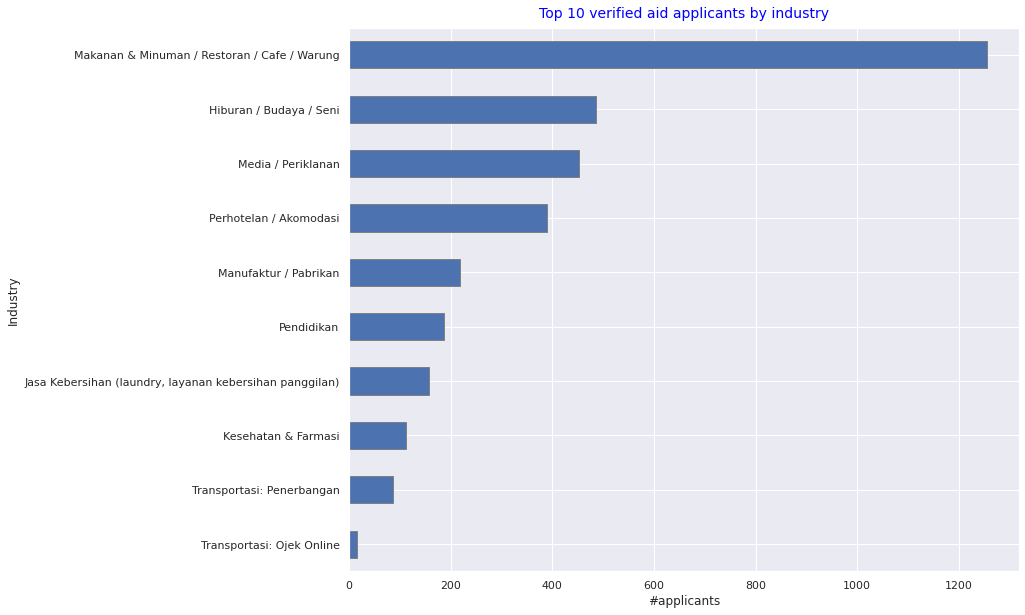

In [105]:
plt.figure(figsize=(12,10))
verified["Industri"].value_counts().head(10).plot.bar()
plt.ylabel("Industry")
plt.xlabel("#applicants")
plt.title("Top 10 verified aid applicants by industry")
plt.show()

### Location

15 besar pelamar bantuan terverifikasi menurut lokasi

In [106]:
verified["Lokasi"].value_counts().head(15)

Jakarta Selatan      562
Jakarta Pusat        236
Jakarta Barat        188
Kota Bandung         181
Jakarta Timur        136
Kota Yogyakarta      129
Jakarta Utara         99
Surabaya              68
Tangerang             67
Tangerang Selatan     60
Kota Denpasar         55
Depok                 52
Semarang              45
Bekasi                45
Bogor                 40
Name: Lokasi, dtype: int64

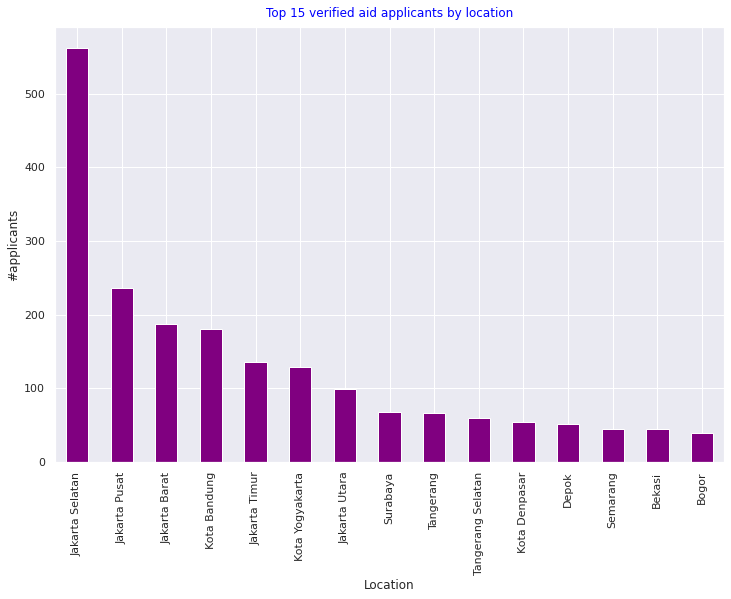

In [107]:
plt.figure(figsize=(12,8))
verified["Lokasi"].value_counts().head(15).plot.bar(color='purple')
plt.xlabel("Location")
plt.ylabel("#applicants")
plt.title("Top 15 verified aid applicants by location")
plt.show()

### Job type

15 besar pelamar bantuan terverifikasi menurut jenis pekerjaan.

In [108]:
verified["Pekerjaan"].value_counts().head(15)

Waitress                166
Barista                 147
Live Band Musician       98
Freelancer               90
Cashier                  77
Teacher                  70
Cook                     63
Cleaning Crew            45
Driver Ojek Online       34
Housekeeping             28
Retailer                 28
Event Organizer Crew     26
Hotel Employee           26
Cook Helper              22
Bartender                22
Name: Pekerjaan, dtype: int64

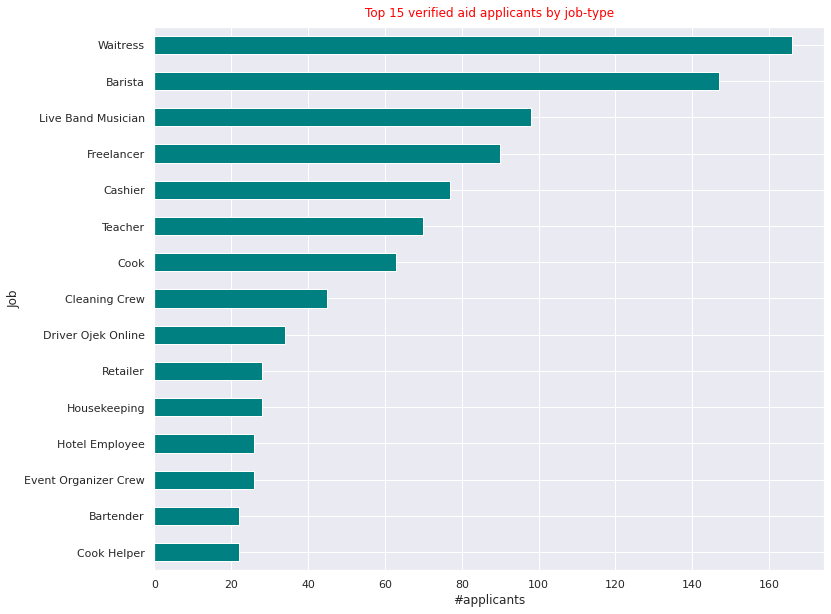

In [109]:
plt.figure(figsize=(12,10))
verified["Pekerjaan"].value_counts().head(15).plot.bar()
plt.ylabel("Job")
plt.xlabel("#applicants")
plt.title("Top 15 verified aid applicants by job-type")
plt.show()

### The Main Trigerring Factors

Dengan bantuan wordcloud kita dapat mengetahui kondisi yang paling sering dihadapi oleh pelamar

Generate a word cloud image

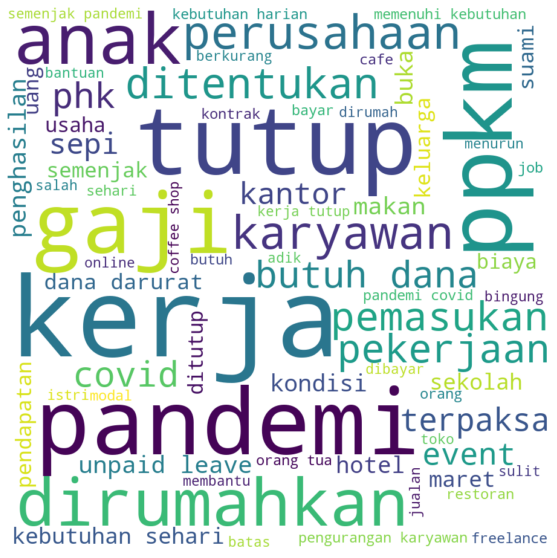

In [113]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=70, mask=mask,
                      min_font_size = 8).generate(text)

# store to file
wordcloud.to_file("img/kondisi-mask.png")

# create coloring from image
image_colors = ImageColorGenerator(mask)

# plot the WordCloud image
plt.figure(figsize=(12,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()